# Perceptron From Scratch

In order to better understand the perceptron model, I decided to code it from scratch only using numpy and matplotlib for visualization.

In [413]:
import numpy as np
import matplotlib.pyplot as plt

The perceptron class itself has constructor and other 3 methods. </br>

Constructor is used to initialize the weights and bias to 0, also decides on the dimension of a weight vector based on *input_count*. </br>

Method predict() is used to predict the labels of data given to it. It returns an array of labels consisting of ones and zeroes (binary classfication). </br>

Method fit() keeps iterating over the training dataset until it gets it all correct or iterates *max_steps* times already. It keeps updating the weights and bias after each incorrect classification.</br>

Last method __activation_function() is the function that decides what label to predict based on the value of dot product between weights vector and input vector (and after adding bias). The function return 1 if the input value is 0 or larger, otherwise it returns 0. Notice, that during the training we require the data point with label 1 not to be equal to 0. </br>

In [414]:
class Perceptron:
  def __init__(self, input_count: int):
    if input_count <= 0:
      raise ValueError(f"input_count must be a positive integer, got {input_count}")
    self.weights = np.zeros(input_count)
    self.bias = 0

  def predict(self, X_data):
    data_size = len(X_data)
    predictions = np.zeros(data_size)

    for i, inputs in enumerate(X_data):
      predictions[i] = self.__activation_function(np.dot(self.weights, inputs) + self.bias)  
    return predictions

  def fit(self, X_data, y_data, max_steps = 10000):
    data_size = len(X_data)
    correct_predictions = 0

    for step in range(max_steps):
      inputs = X_data[step % data_size]
      activation_func_input = (np.dot(self.weights, inputs) + self.bias)

      if (2 * y_data[step % data_size] - 1) * activation_func_input > 0:
        correct_predictions += 1
        if correct_predictions == data_size:
          return 
      else:
        correct_predictions = 0
        self.weights += (2 * y_data[step % data_size] - 1) * X_data[step % data_size]
        self.bias += (2 * y_data[step % data_size] - 1)
    print("RAN OUT OF STEPS")
      
  def __activation_function(self, x):
    if x >= 0:
      return 1
    return 0

In order for the algorithm to converge we need to have linearly separable dataset, a good example would be the AND operator. So, we will create dataset based on the AND operator only with adding some noise to make it a bit more interesting.

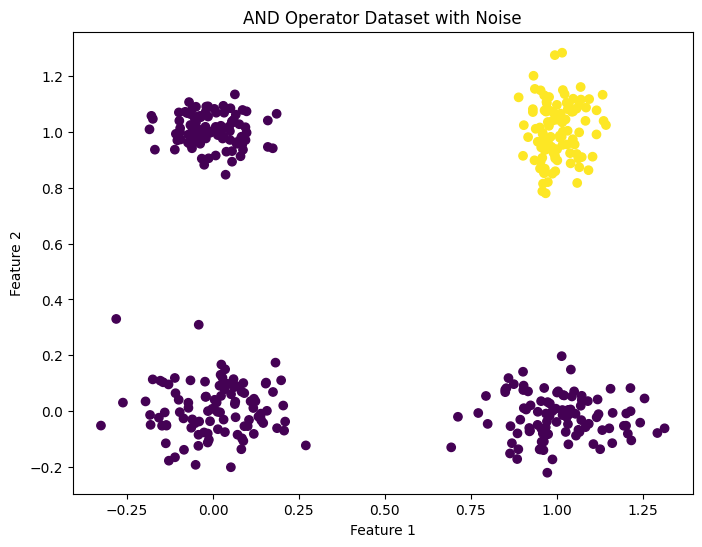

In [415]:
X_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [0, 0, 0, 1]

dataset_x = []
dataset_y = []

number_samples = 100
for idx in range(len(X_data)):
    mean_x = X_data[idx][0]
    std_dev_x = np.random.uniform(0.05, 0.13)
    mean_y = X_data[idx][1]
    std_dev_y = np.random.uniform(0.05, 0.13)

    x_values = np.random.normal(mean_x, std_dev_x, number_samples)
    y_values = np.random.normal(mean_y, std_dev_y, number_samples)

    dataset_x.extend(zip(x_values, y_values))
    dataset_y.extend([y_data[idx]] * number_samples)

dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)

plt.figure(figsize=(8, 6))
plt.scatter(dataset_x[:, 0], dataset_x[:, 1], c=dataset_y)
plt.title('AND Operator Dataset with Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar().remove()
plt.show()

We will shuffle the dataset and divide it into training and test sets (80%, 20%). 

In [416]:
train_data_size = int(np.floor(0.8 * len(dataset_x)))

combined = list(zip(dataset_x, dataset_y))
np.random.shuffle(combined)
dataset_x, dataset_y = zip(*combined)
dataset_x, dataset_y = np.array(dataset_x), np.array(dataset_y) 

X_train_data = dataset_x[:train_data_size]
y_train_data = dataset_y[:train_data_size]

X_test_data = dataset_x[train_data_size:]
y_test_data = dataset_y[train_data_size:]

We train the model on training dataset. After trying to predict the test data, we can see 100% prediction accuracy, which is not very surprising considering we chose linearly separable case, which is proved to converge.

In [417]:
model = Perceptron(2)
model.fit(X_train_data, y_train_data)
print(f"Accuracy (train data): {(sum((y_train_data - model.predict(X_train_data)) == 0)) / len(y_train_data)}")
print(f"Accuracy (test data): {(sum((y_test_data - model.predict(X_test_data)) == 0)) / len(y_test_data)}")

Accuracy (train data): 1.0
Accuracy (test data): 1.0


One more thing we can do is to look at the decision boundary. The classifying of labels changes when *np.dot(weights, inputs) × bias = 0*, which is a hyperplane in a space with a dimension of dim(weights). Therefore, we can easily visualize 2 dimensional dataset being separated by a straight line. </br>

In our specific case, we know the equation for the hyperplane is the following:
- w0 + w1x1 + w2x2 = 0 </br>

Based on that, we visualize the separating line.

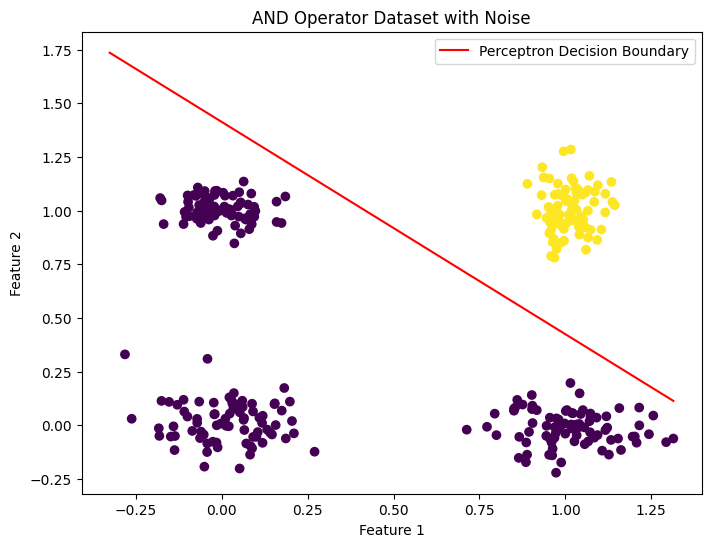

In [418]:
slope = -model.weights[0] / model.weights[1]
intercept = -model.bias / model.weights[1]

lnspace = np.linspace(min(dataset_x[:, 0]), max(dataset_x[:, 0]), 1000)
decision_boundary = slope * lnspace + intercept


plt.figure(figsize=(8, 6))
plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data)
plt.title('AND Operator Dataset with Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar().remove()
plt.plot(lnspace, decision_boundary, color='red', label='Perceptron Decision Boundary')
plt.legend()
plt.show()